In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
hbar = 6.5821e-16 #eV s
c = 2.99792e8 #m/s
m_e = 0.51099e6 * c**2#eV /c^2 
k_b = 8.617e-5 #eV/k

tau_ph = 242e-12 #s
delta = 0.17e-3 #eV
Theta_1 = 10.6 * delta
Omega_D = 36.9e-3
phonon_v = 6420 #m/s

n_cp = 4e6 * (1e6)**3 # m^-3
tau_p_qq = 1e-9 #s, over energy in K from Martinis
tau_q_qp = (1700e-9) #s, over energy - delta in K cubed
tau_rec = (20e-9) #s, over qp density over n_cp

In [3]:
def get_phonon_decay_time(energy):
    return np.random.exponential() * tau_p_qq / (energy / k_b)

def get_quasiparticle_splitting_time(energy):
    return np.random.exponential() * tau_q_qp /((energy - delta)**3 * k_b**-3)

def get_next_recombination(qps):
    #qps is an array of the objects for quasiparticles
    
    x_pos_arr = []
    y_pos_arr = []
    z_pos_arr = []
    i = 0
    while i < len(qps):
        x_pos_arr.append(qps[i].pos_x)
        y_pos_arr.append(qps[i].pos_y)
        z_pos_arr.append(qps[i].pos_z)
        i += 1
    
    centroid_x = np.mean(x_pos_arr)
    centroid_y = np.mean(y_pos_arr)
    centroid_z = np.mean(z_pos_arr)
    
    stdev_x = np.std(x_pos_arr)
    stdev_y = np.std(y_pos_arr)
    stdev_z = np.std(z_pos_arr)
    
    cutoff_sigma = 2.0
    points_in_roi = []
    i = 0
    return None


    

0.7612949128424048
0.5202806777340407
 
0.8653078521895159
0.5471795820547476


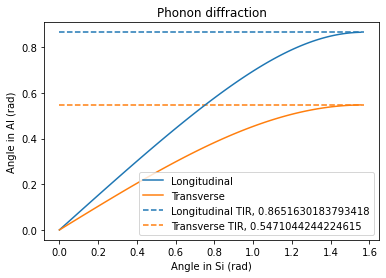

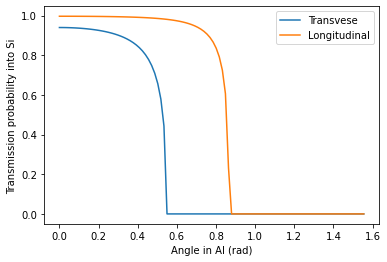

In [4]:
cs_si_l = 8433 # m/s
cs_si_t = 5843 # m/s

cs_al_l = 6420 # m/s
cs_al_t = 3040 # m/s

rho_al = 2710 #kg/m^3
rho_si = 2330 #kg/m^3

n_ratio_t = cs_al_t/cs_si_t
n_ratio_l = cs_al_l/cs_si_l
print(n_ratio_l)
print(n_ratio_t)
print(" ")
print(np.arcsin(n_ratio_l))
print(np.arcsin(n_ratio_t))

def get_si_angle(theta, longitudinal):
    if longitudinal:
        n_over_n = cs_si_l/cs_al_l
    else:
        n_over_n = cs_si_t/cs_al_t
    
    return np.arcsin(n_over_n * np.sin(theta))

def get_al_angle(theta, longitudinal):
    if longitudinal:
        n_over_n = cs_si_l/cs_al_l
    else:
        n_over_n = cs_si_t/cs_al_t
    
    return np.arcsin(n_over_n**-1 * np.sin(theta))

angles = np.arange(0, np.pi/2, np.pi/200)

angle_l = []
angle_t = []
i = 0
while i < len(angles):
    angle_l.append(get_al_angle(angles[i], True))
    angle_t.append(get_al_angle(angles[i], False))
    i += 1
    
plt.plot(angles, angle_l, label = "Longitudinal")
plt.plot(angles, angle_t, label = "Transverse")
plt.hlines([angle_l[-1]], 0, np.pi/2, linestyle = "--", label = "Longitudinal TIR, " + str(angle_l[-1]), color = "C0")
plt.hlines([angle_t[-1]], 0, np.pi/2, linestyle = "--", label = "Transverse TIR, " + str(angle_t[-1]), color = "C1")
plt.legend()
plt.xlabel("Angle in Si (rad)")
plt.ylabel("Angle in Al (rad)")
plt.title("Phonon diffraction")
plt.show()

al_tir_t = angle_t[-1]
al_tir_l = angle_l[-1]

def get_alpha_amm(theta, transverse):
    if transverse:
        if theta > al_tir_t:
            return 0.0
    else:
        if theta > al_tir_l:
            return 0.0
        
    theta_si = get_si_angle(theta, not transverse)
    
    if transverse:
        prefactor = 4 * rho_si*cs_si_t / (rho_al * cs_al_t)
    else:
        prefactor = 4 * rho_si*cs_si_l / (rho_al * cs_al_l)
    
    numerator = prefactor * np.cos(theta_si)/np.cos(theta)
    demoninator = (0.25*prefactor + np.cos(theta_si)/np.cos(theta))**2
    
    return numerator/demoninator

alpha_t = []
alpha_l = []

i = 0
while i < len(angles):
    alpha_t.append(get_alpha_amm(angles[i], True))
    alpha_l.append(get_alpha_amm(angles[i], False))
    i += 1
    
plt.plot(angles, alpha_t, label = "Transvese")
plt.plot(angles, alpha_l, label = "Longitudinal")
plt.xlabel("Angle in Al (rad)")
plt.ylabel("Transmission probability into Si")
plt.legend()
plt.show()

def get_rand_theta_phi():
    vec = np.random.randn(3)
    vec /= np.linalg.norm(vec, axis=0)
    
    theta = np.arccos(vec[2])
    phi = np.random.rand()*2 * np.pi
    return theta, phi

In [5]:
class particle:
    def __init__(self, energy, creation_time, pos_x, pos_y, pos_z, 
                 angle_theta, angle_phi, 
                 sub_gap = False, phonon = True, in_substrate = False):
        self.energy = energy
        self.creation_time = creation_time 
        self.pos_x = pos_x
        self.pos_y = pos_y
        self.pos_z = pos_z
        self.angle_theta = angle_theta
        self.angle_phi = angle_phi
        self.sub_gap = sub_gap
        self.phonon = phonon
        self.in_substrate = in_substrate
        
    def decay_cycle_particle(self):
        #print("Started decay cycle")
        if self.energy < stop_limit:
            #print("Under Stop Limit")
            #print("Stopped decay cycle, under stop limit")
            return None
        if self.sub_gap == True:
            #print("Stopped decay cycle, under gap")
            return None
        if self.in_substrate == True:
            #print("Stopped decay cycle, in substrate")
            return None
        
        #see if qp recombines
        #if self.phonon == False:
        #    recomb_gen_time = 20e-9 * np.random.exponential() #placeholder
        #    lifetime = tau_q_qp * ((self.energy - delta)/k_b)**-3
        #    
        #    if recomb_gen_time < lifetime:
        #        self.phonon = True
        #        return None
        
        self.update_pos_time_at_decay()
        #if self.phonon:
            #print("Phonon, Z height: " + str(self.pos_z) + ", Theta: " + str(self.angle_theta))
        #else:
            #print("QP, Z height: " + str(self.pos_z) + ", Theta: " + str(self.angle_theta))
        i = 0
        while ((self.pos_z < 0.0) or (self.pos_z > film_thickness)):
            if self.pos_z < 0.0:
                #print("Phonon with energy " + str(self.energy * 1e3) + " meV hit substrate interface")
                self.reflect_transmit_particle()
                if self.in_substrate == True:
                    "Finished decay cycle, in substrate"
                    return None
            if self.pos_z > film_thickness:
                #assume specular reflection at top of film
                #old_z = self.pos_z
                #old_theta = self.angle_theta
                #self.pos_z = 2 * film_thickness - old_z
                #self.angle_theta = np.pi - old_theta
                
                #set z to top, randomly generate angle
                self.pos_z = film_thickness - 1e-9
            i += 1
            #print("Hit interface " + str(i) + " times")

        self.angle_theta, self_angle_phi = get_rand_theta_phi()
        if (self.in_substrate == False):
            new_particle_energy = self.split_energy()
            if new_particle_energy < delta:
                sub_gap_new_particle = True
            else:
                sub_gap_new_particle = False
            
            
        new_particle = particle(new_particle_energy, self.creation_time,
                               self.pos_x, self.pos_y, self.pos_z, self.angle_theta, self.angle_phi,
                               sub_gap_new_particle, not self.phonon, in_substrate = False)
        self.phonon = False
        self.angle_theta, self_angle_phi = get_rand_theta_phi()
        #print("Finished decay cycle, particle split")
        return new_particle

    def update_pos_time_at_decay(self):
        if self.phonon == True:
            lifetime = tau_p_qq * (self.energy/ k_b)**-1
            #print("Energy in K: " + str(self.energy/ k_b))
            #print("Tau_p_qq: " + str(tau_p_qq))
        else:
            lifetime = tau_q_qp * ((self.energy - delta)/k_b)**-3

        #print("Liefetime: " + str(lifetime*1e9) + " ns, range " + str(phonon_v * 1e9 * lifetime) + " nm")
        lifetime *= np.random.exponential()
        old_time = self.creation_time
        self.creation_time = old_time + lifetime
        if self.phonon:
            old_x = self.pos_x
            old_y = self.pos_y
            old_z = self.pos_z

            self.pos_x = old_x + lifetime * np.cos(self.angle_phi)*np.sin(self.angle_theta) * phonon_v
            self.pos_y = old_y + lifetime * np.sin(self.angle_phi)*np.sin(self.angle_theta) * phonon_v
            self.pos_z = old_z + lifetime * np.cos(self.angle_theta) * phonon_v
        else:
            qp_v_fermi = 2.02e6 #m/s
            qp_v = qp_v_fermi * (1 - delta**2 * self.energy**-2)**0.5
            
            old_x = self.pos_x
            old_y = self.pos_y
            old_z = self.pos_z

            self.pos_x = old_x + lifetime * np.cos(self.angle_phi)*np.sin(self.angle_theta) * qp_v
            self.pos_y = old_y + lifetime * np.sin(self.angle_phi)*np.sin(self.angle_theta) * qp_v
            self.pos_z = old_z + lifetime * np.cos(self.angle_theta) * qp_v

        #self.angle_theta, self_angle_phi = get_rand_theta_phi()

    def reflect_transmit_particle(self):
        transverse = np.random.choice([True, False])
        #transverse = False
        alpha = get_alpha_amm(np.pi - self.angle_theta, transverse)
        #print("Gave theta: " + str(np.pi - self.angle_theta))
        #print("Got alpha: " + str(alpha))
        
        if np.random.random() > alpha:
            old_z = self.pos_z
            old_theta = self.angle_theta
            self.pos_z =-1 * old_z
            self.angle_theta = np.pi - old_theta
        else:
            self.in_substrate = True

    def split_energy(self):
        #assume the qp density of states is pefectly flat... until we get quite close to
        #delta this is a good aproximation. Therefore the density of states for the phonon
        #energy is just E \propto p^2
        total_energy = self.energy

        #for linear PDF, gets randomly generated energy

        i = 0
        while i == 0:
            rand_x = np.random.random()
            rand_y = np.random.random()
            if rand_y < np.sqrt(rand_x):
                #dos should scale as sqrt(energy)
                phonon_energy = (total_energy - delta) * rand_x
                i = 1

        if self.phonon:
            #if we're splitting into two QPs, the DOS is flat. So we jusrt randomly draw a number
            #between zero and one and that's the fraction of energy in one of the two QPs
            self.energy = np.random.random() * (total_energy - 2* delta) + delta
            return (total_energy - self.energy)
        else:
            self.energy = (total_energy - phonon_energy)
            return phonon_energy
            
        

In [18]:
#film_thickness = 600e-9
film_thickness = 40e-9
stop_limit = 2 * delta

Number of particles: 1
New number of particles: 2
Number of new particles: 1
Energies, - = ph: ['1.07442 ph False sub False gap False z: 39.0', '8.92557 ph False sub False gap False z: 39.0']
Number of particles: 2
New number of particles: 4
Number of new particles: 2
Energies, - = ph: ['0.22204 ph False sub False gap False z: 39.0', '5.59742 ph False sub False gap False z: 39.0', '0.85238 ph True sub False gap False z: 39.0', '3.32814 ph True sub False gap False z: 39.0']
Number of particles: 4
New number of particles: 7
Number of new particles: 3
Energies, - = ph: ['0.22204 ph False sub False gap False z: 39.0', '1.54617 ph False sub False gap False z: 39.0', '0.22026 ph False sub False gap False z: 39.0', '2.30795 ph False sub False gap False z: 12.6', '4.05125 ph True sub False gap False z: 39.0', '0.63212 ph False sub False gap False z: 39.0', '1.02019 ph False sub False gap False z: 12.6']
Number of particles: 7
New number of particles: 11
Number of new particles: 4
Energies, - =

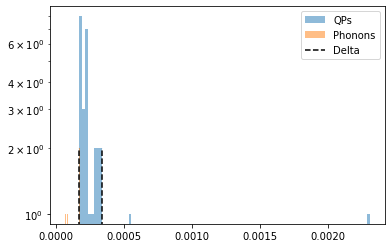

[]
Energy in substrate: 0 eV
Energy in film QPs: 0.008795866668520728 eV
Energy in film phonons: 0 eV
Total energy able to make phonons: 0.008795866668520728 eV


In [7]:
rand_theta, rand_phi = get_rand_theta_phi()
z_start = np.random.random() * film_thickness
start_phonon = particle(10e-3, 0, 0, 0, z_start, rand_theta, rand_phi)
particles = [start_phonon]

i = 0
while i < 10:
    new_particles = []
    j = 0
    print("Number of particles: " + str(len(particles)))
    while j < len(particles):
        new_particle = particles[j].decay_cycle_particle()
        if new_particle is None:
            h = 0
        else:
            new_particles.append(new_particle)
        j += 1
        
    particles = particles + new_particles
    print("New number of particles: " + str(len(particles)))
    print("Number of new particles: " + str(len(new_particles)))
    phonon_number = 0
    k = 0
    while k < len(particles):
        if particles[k].phonon == True:
            phonon_number += 1
        k += 1
    #print("Phonons: " + str(phonon_number))
    energies = []
    k = 0
    while k < len(particles):
        part_energy = particles[k].energy *1e3
        energies.append(str(part_energy)[0:7] + " ph " + str(particles[k].phonon) + " sub " + str(particles[k].in_substrate)
                        + " gap " + str(particles[k].sub_gap) + " z: " + str(particles[k].pos_z*1e9)[0:4])
        k += 1
    print("Energies, - = ph: " + str(energies))
    
    i += 1
    
qp_energies = []
energy_in_qps = 0
ph_energies = []
energy_in_phs = 0
sub_phs = []
energy_in_sub = 0
i = 0 
while i < len(particles):
    if particles[i].phonon == True:
        ph_energies.append(particles[i].energy)
        if particles[i].in_substrate == True:
            sub_phs.append(particles[i].energy)
            energy_in_sub += particles[i].energy
        elif particles[i].energy > 2*delta:
            energy_in_phs += particles[i].energy
    else:
        qp_energies.append(particles[i].energy)
        energy_in_qps += particles[i].energy
    i += 1
    
plt.hist(qp_energies, bins = 100, label = "QPs", alpha = 0.5)
plt.hist(ph_energies, bins = 100, label = "Phonons", alpha = 0.5)
#if len(sub_phs) > 0:
#    plt.hist(sub_phs, bins = 100, label = "Phonons in Sunbstrate", alpha = 0.5)
plt.vlines([delta, 2*delta], 0, 2, label = "Delta", linestyle = "--")
plt.legend()
#plt.xscale('log')
#plt.xlim(-1e-3, 5.5e-3)
plt.yscale('log')
plt.show()

print(sub_phs)
print("Energy in substrate: " + str(energy_in_sub) + " eV")
print("Energy in film QPs: " + str(energy_in_qps) + " eV")
print("Energy in film phonons: " + str(energy_in_phs) + " eV")
print("Total energy able to make phonons: " + str(energy_in_sub + energy_in_qps + energy_in_phs) + " eV")

In [11]:
def sim_phonon_cascades(start_energy, n_phonons):
    print("Simulating " + str(n_phonons) + " " + str(1e3 * start_energy) + " meV phonons")
    a = 0
    energies_in_qps = []
    energies_in_phonons = []
    energies_in_substrate = []
    z_starts = []
    while a < n_phonons:
        rand_theta, rand_phi = get_rand_theta_phi()
        z_start = np.random.random() * film_thickness
        #z_start = 1e-9
        start_phonon = particle(start_energy, 0, 0, 0, z_start, rand_theta, rand_phi)
        particles = [start_phonon]

        i = 0
        while i < 50:
            new_particles = []
            j = 0
            while j < len(particles):
                new_particle = particles[j].decay_cycle_particle()
                if new_particle is None:
                    h = 0
                else:
                    new_particles.append(new_particle)
                j += 1

            particles = particles + new_particles
            phonon_number = 0
            k = 0
            while k < len(particles):
                if particles[k].phonon == True:
                    phonon_number += 1
                k += 1
            #print("Phonons: " + str(phonon_number))

            i += 1

        energy_in_qps = 0
        energy_in_phs = 0
        energy_in_sub = 0
        i = 0 
        while i < len(particles):
            if particles[i].phonon == True:
                if particles[i].in_substrate == True:
                    energy_in_sub += particles[i].energy
                elif particles[i].energy > 2*delta:
                    energy_in_phs += particles[i].energy
            else:
                energy_in_qps += particles[i].energy
            i += 1
            
        energies_in_qps.append(energy_in_qps)
        energies_in_phonons.append(energy_in_phs)
        energies_in_substrate.append(energy_in_sub)
        z_starts.append(z_start)
        
        if (a % 1000) == 0:
            print("Done with " + str(a) + " sims")
        a += 1
    return energies_in_substrate, energies_in_qps, energies_in_phonons, z_starts


def get_average_sub_qp_energy_energies(energy_arr, n_per_point):
    sub_energies = []
    qp_energies = []
    initial_heights = []
    
    i = 0
    while i < len(energy_arr):
        sub_energy, qp_energy, _, initial_height = sim_phonon_cascades(energy_arr[i], n_per_point)
        bins = np.arange(0, 41/40, 1/40)
        
        plt.hist(sub_energy/energy_arr[i], bins = bins, label = "Substrate Energy", histtype = 'step')
        plt.legend()
        plt.grid()
        plt.yscale('log')
        plt.title("At " + str(energy_arr[i]*1e3) + " meV initial energy")
        plt.show()
        
        
        plt.hist(qp_energy/energy_arr[i], bins = bins, label = "QP Energy", histtype = 'step')
        plt.legend()
        plt.grid()
        plt.yscale('log')
        plt.title("At " + str(energy_arr[i]*1e3) + " meV initial energy")
        plt.show()
        
        plt.scatter(qp_energy/energy_arr[i], sub_energy/energy_arr[i], c = np.asarray(initial_height)*1e9)
        plt.xlabel("Quasiparticle Energy Fraction")
        plt.ylabel("Substrate Phonons Energy Fraction")
        plt.title("At " + str(energy_arr[i]*1e3) + " meV initial energy")
        plt.colorbar(label = "Initial height, nm")
        plt.show()
        
        sub_energies.append(np.mean(sub_energy))
        qp_energies.append(np.mean(qp_energy))
        initial_heights.append(initial_height)
        i += 1
    return sub_energies, qp_energies, initial_heights

In [12]:
#energies_in_substrate_, energies_in_qps_, energies_in_phonons_ = sim_phonon_cascades(55e-3, 1000)

bins = np.arange(0, 10*delta, delta/100.0)

plt.hist(energies_in_substrate_, bins = bins, alpha = 0.5, label = "Energy in substrate")
plt.hist(energies_in_qps_, bins = bins, alpha = 0.5, label = "Energy in QPs")
plt.hist(energies_in_phonons_, bins = bins, alpha = 0.5, label = "Energy in phonons")
plt.legend()
plt.show()

print("Average energy in substrate: " + str(np.mean(energies_in_substrate_)*1e3) + " meV")
print("Average energy in QPs: " + str(np.mean(energies_in_qps_)*1e3) + " meV")
print("Average energy in phonons: " + str(np.mean(energies_in_phonons_)*1e3) + " meV")


NameError: name 'energies_in_substrate_' is not defined

[0.00031623 0.00035004 0.00038747 0.0004289  0.00047476 0.00052552
 0.00058171 0.00064391 0.00071276 0.00078897 0.00087333 0.00096671
 0.00107007 0.00118448 0.00131113 0.00145133 0.00160651 0.00177828
 0.00196842 0.00217889 0.00241186 0.00266975 0.00295521 0.00327119
 0.00362096 0.00400812 0.00443669 0.00491107 0.00543618 0.00601744
 0.00666085 0.00737305 0.0081614  0.00903405 0.01      ]
Simulating 10000 0.31622776601683794 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


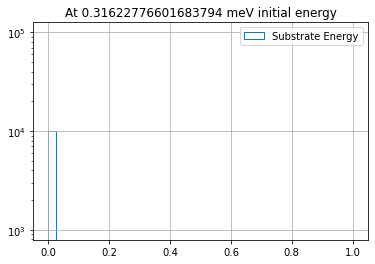

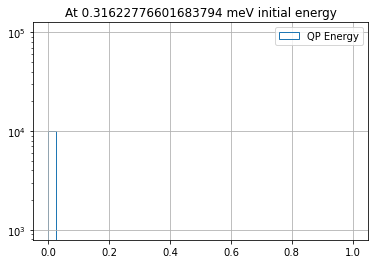

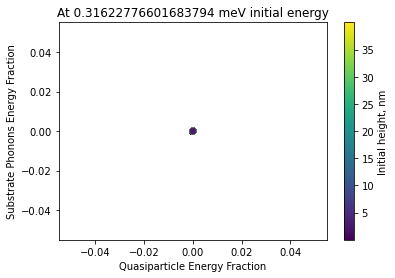

Simulating 10000 0.3500399773429978 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


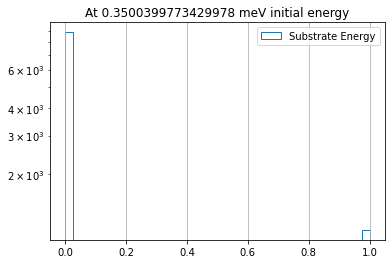

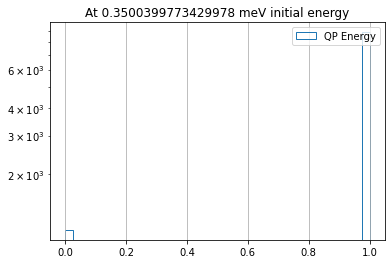

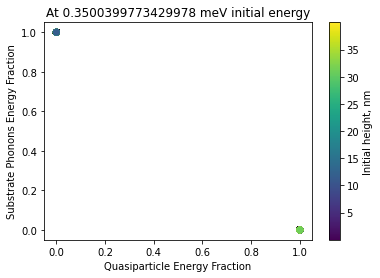

Simulating 10000 0.38746751204561325 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


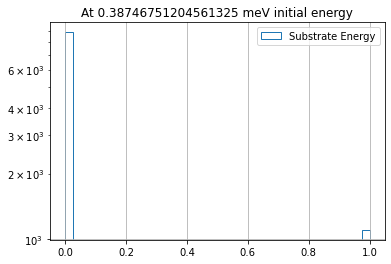

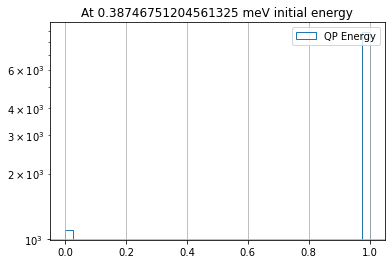

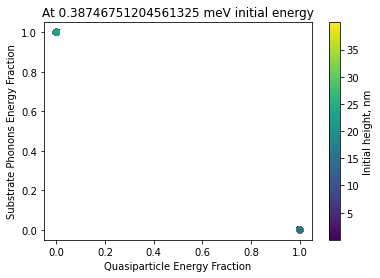

Simulating 10000 0.42889693351712965 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


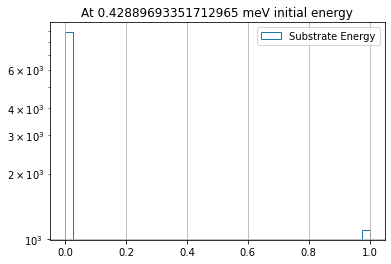

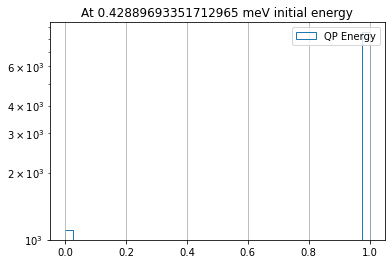

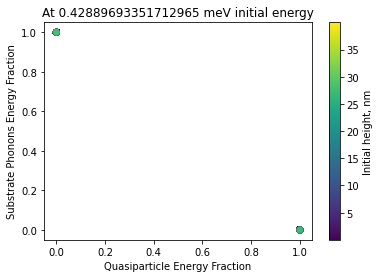

Simulating 10000 0.474756137899742 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


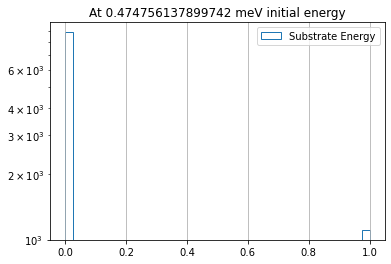

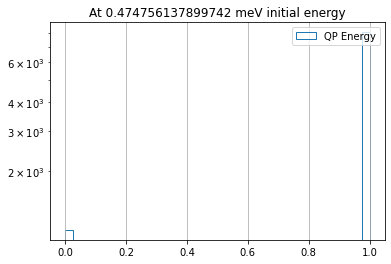

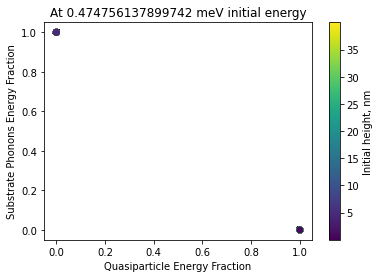

Simulating 10000 0.5255187735318168 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


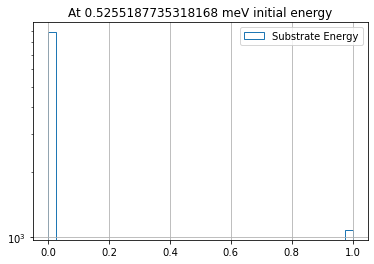

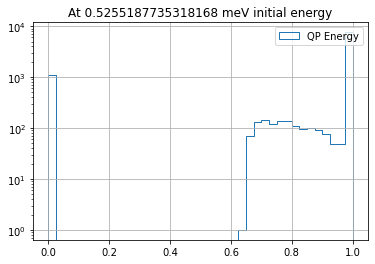

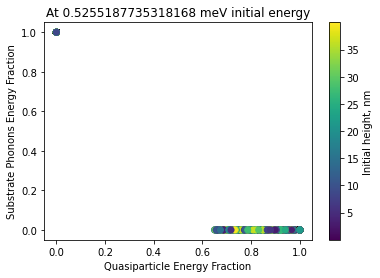

Simulating 10000 0.5817091329374359 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


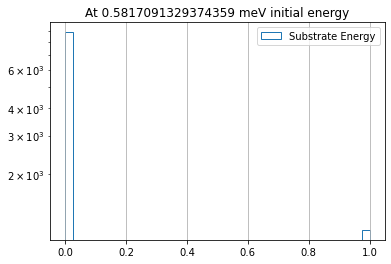

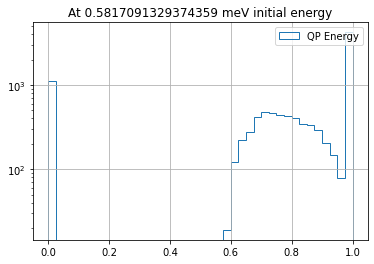

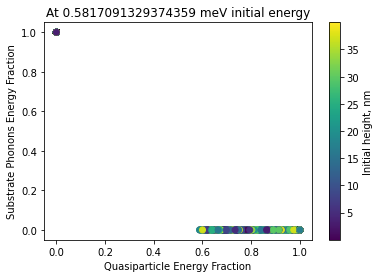

Simulating 10000 0.643907567885082 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


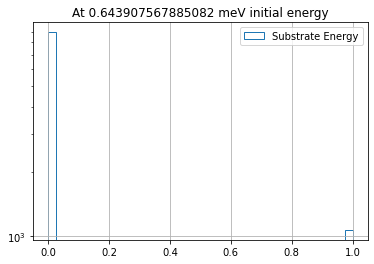

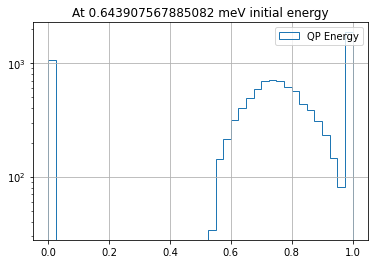

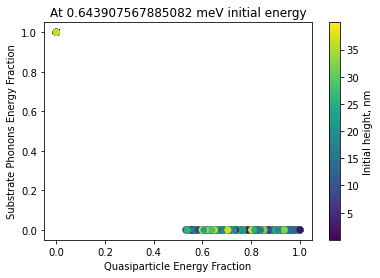

Simulating 10000 0.7127564834438914 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


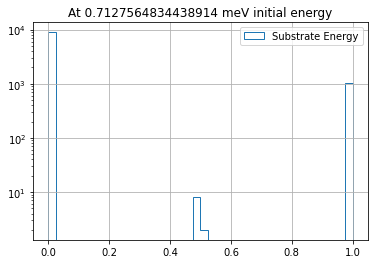

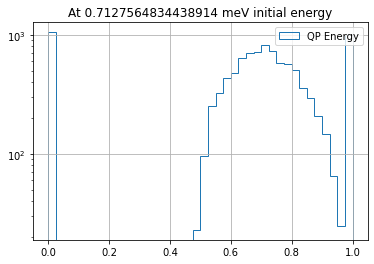

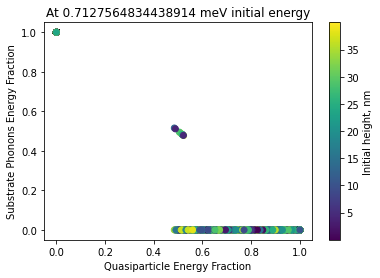

Simulating 10000 0.7889669729459808 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


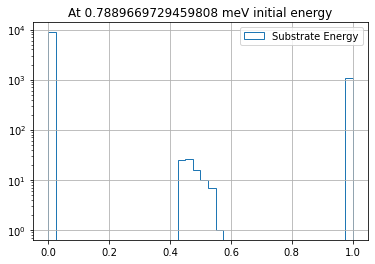

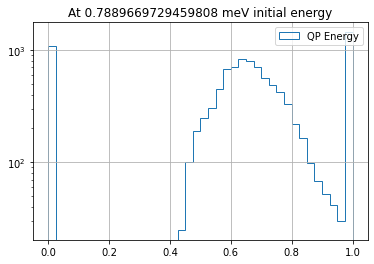

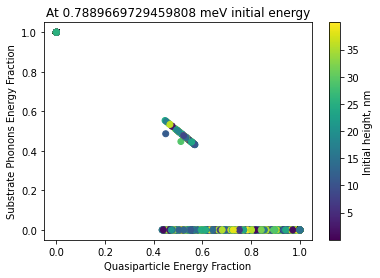

Simulating 10000 0.8733261623828438 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


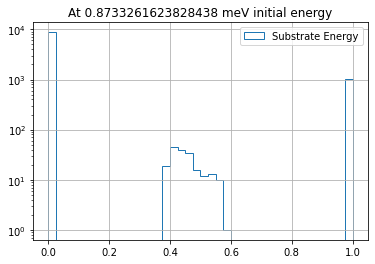

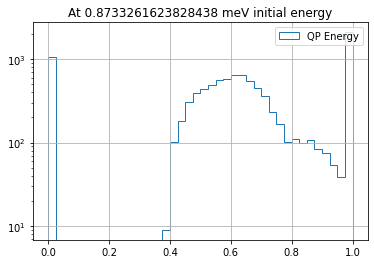

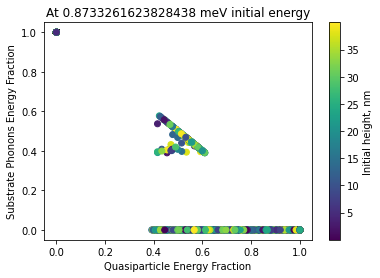

Simulating 10000 0.9667053400910421 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


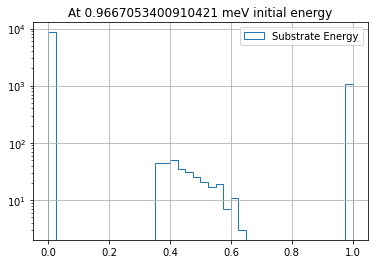

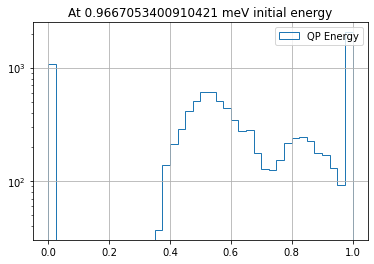

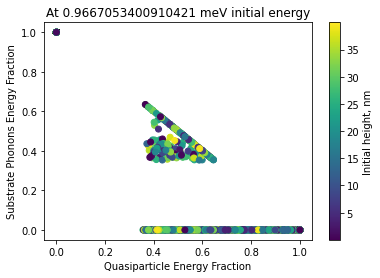

Simulating 10000 1.0700689556931746 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


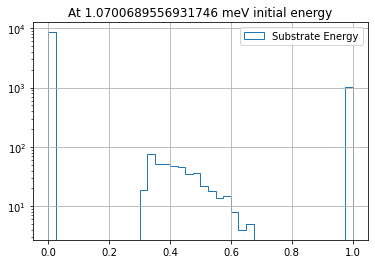

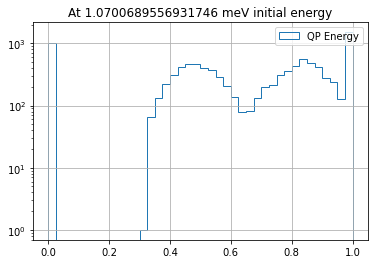

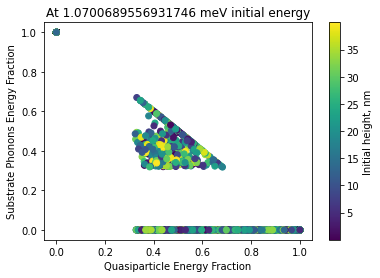

Simulating 10000 1.1844845812380063 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


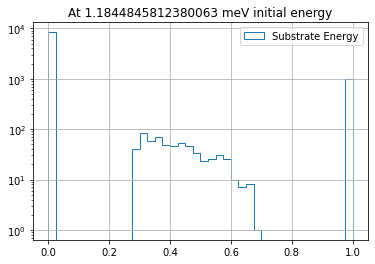

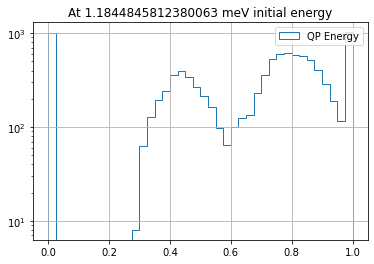

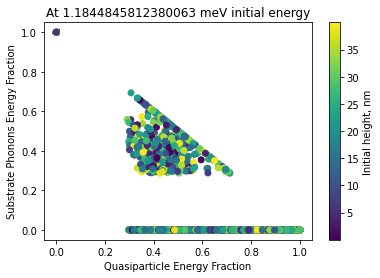

Simulating 10000 1.3111339374215643 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


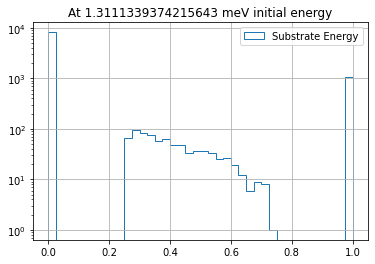

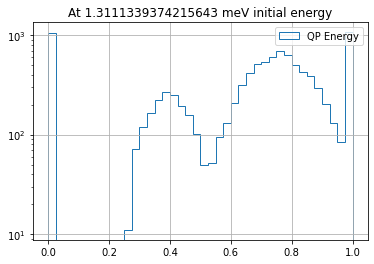

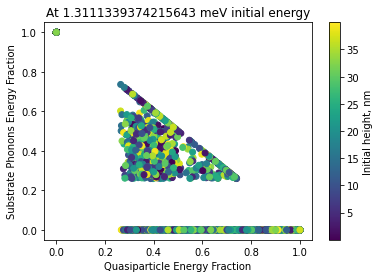

Simulating 10000 1.451325098771507 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


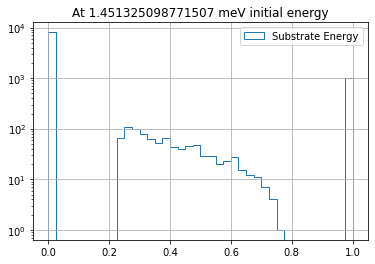

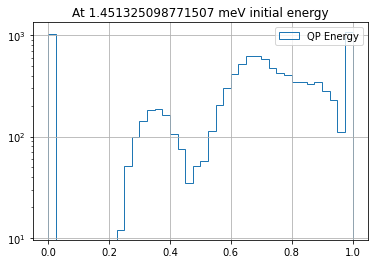

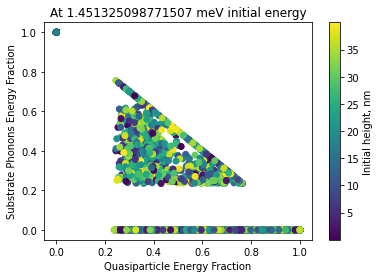

Simulating 10000 1.6065060038537287 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


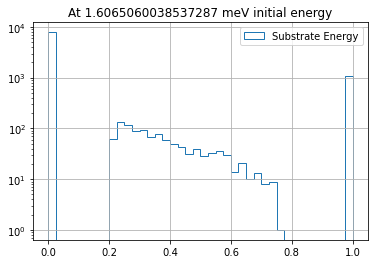

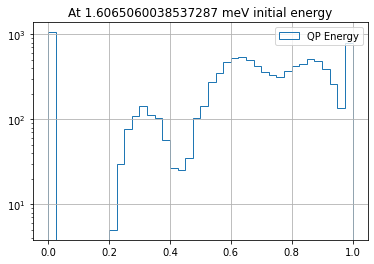

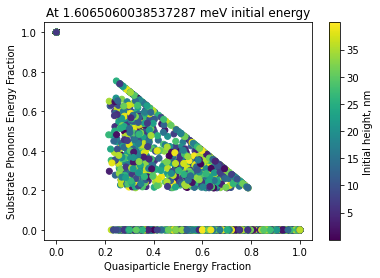

Simulating 10000 1.7782794100389228 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


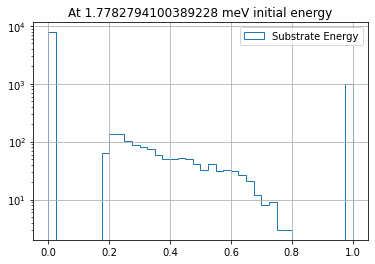

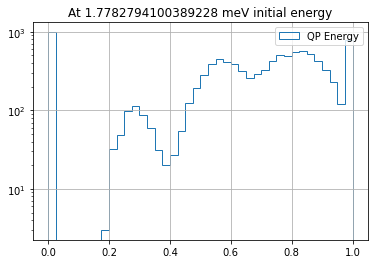

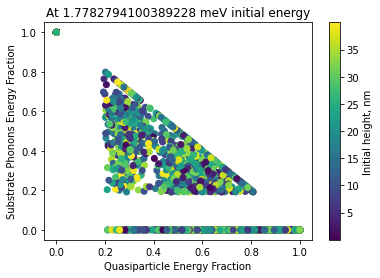

Simulating 10000 1.9684194472866112 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


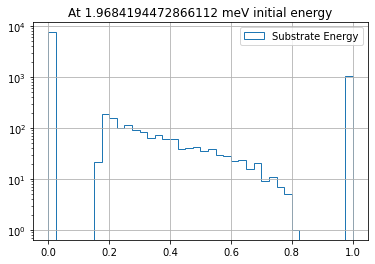

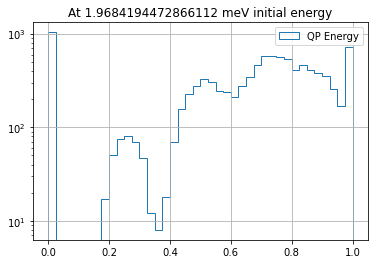

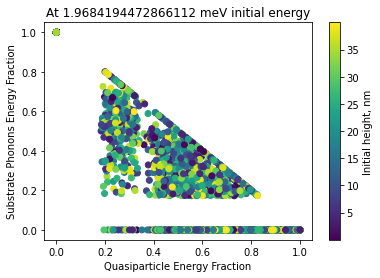

Simulating 10000 2.178889941919377 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


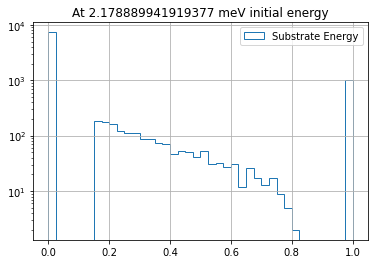

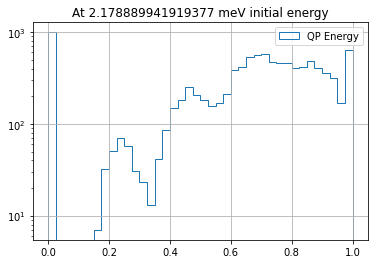

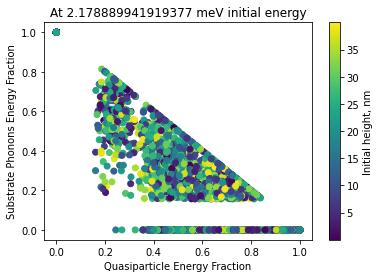

Simulating 10000 2.411864699640997 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


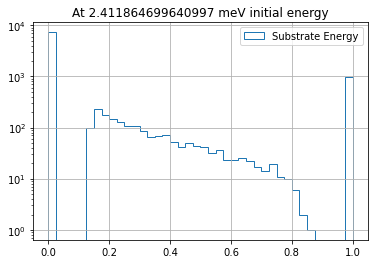

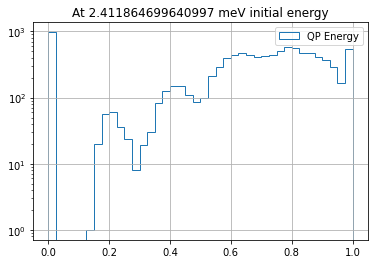

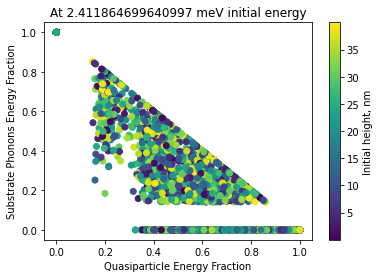

Simulating 10000 2.6697499572879333 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


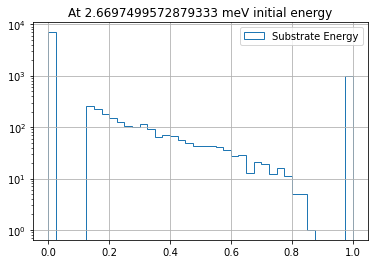

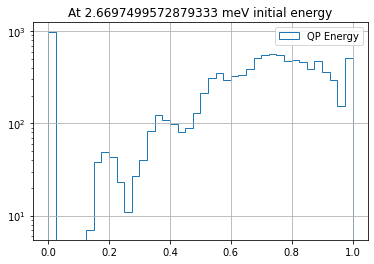

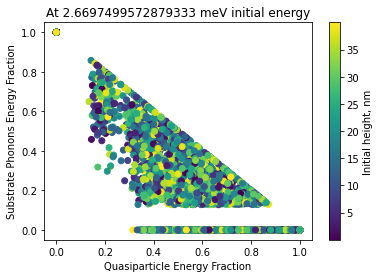

Simulating 10000 2.955209235202888 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


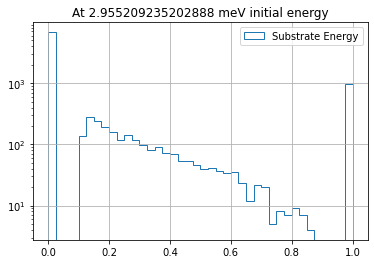

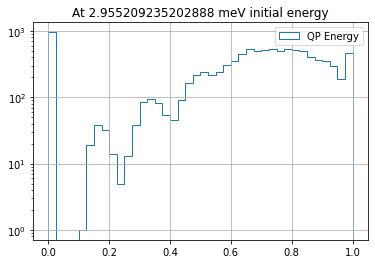

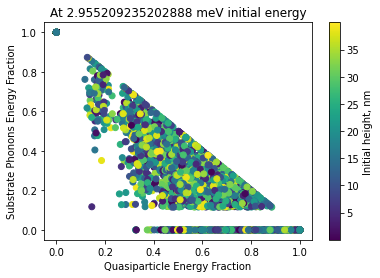

Simulating 10000 3.2711908469136657 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


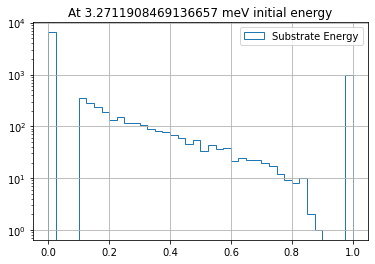

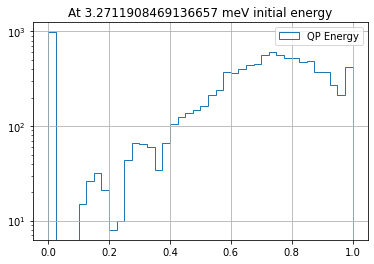

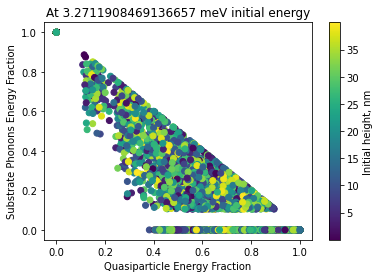

Simulating 10000 3.6209583502459166 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


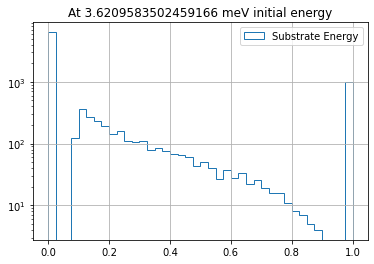

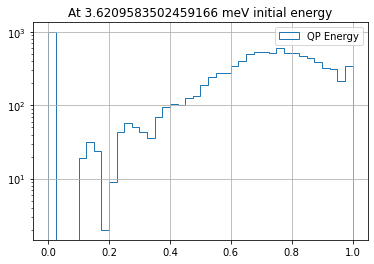

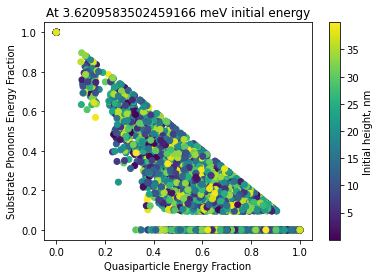

Simulating 10000 4.008124254378511 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


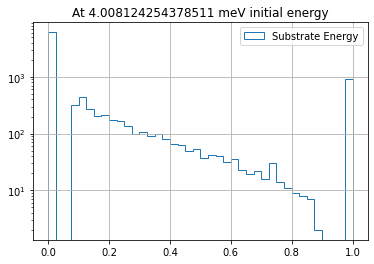

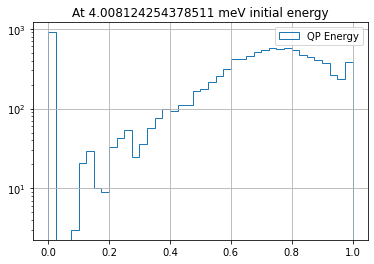

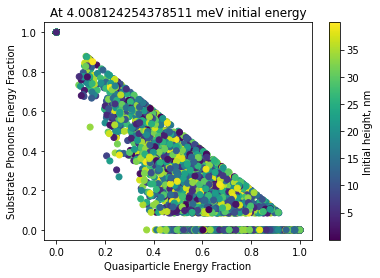

Simulating 10000 4.436687330978616 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


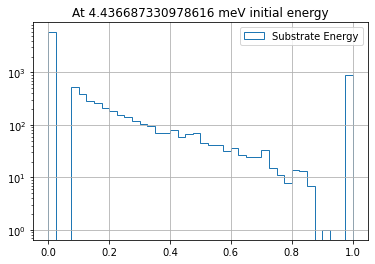

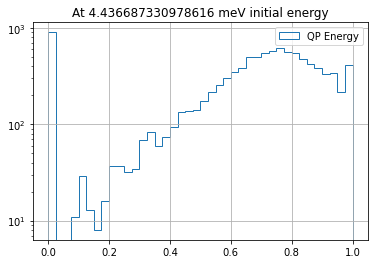

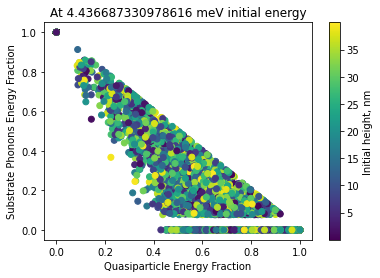

Simulating 10000 4.911073914777703 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


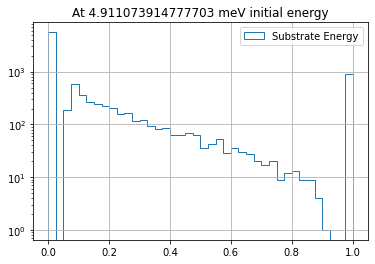

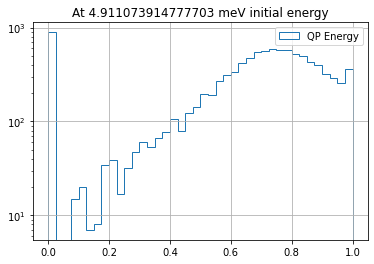

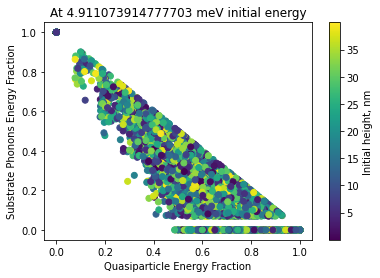

Simulating 10000 5.436183620153837 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


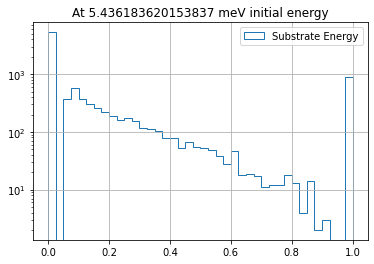

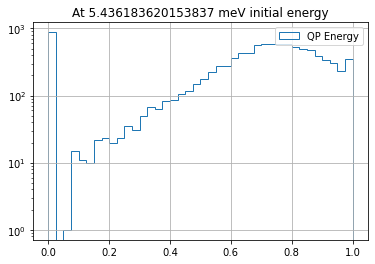

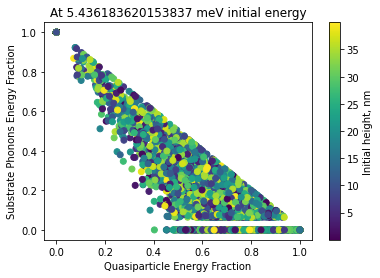

Simulating 10000 6.017439945895527 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


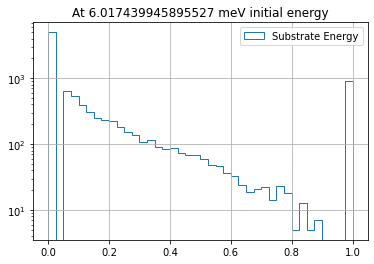

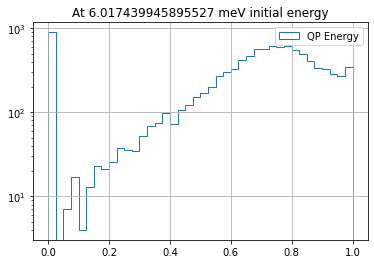

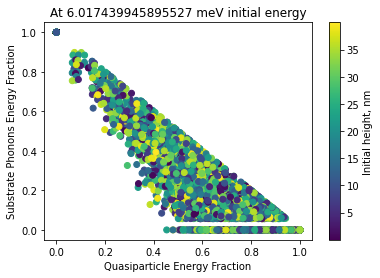

Simulating 10000 6.660846290809161 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


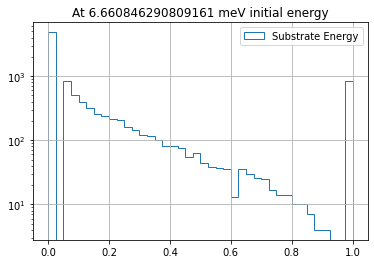

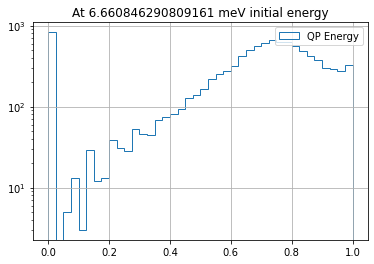

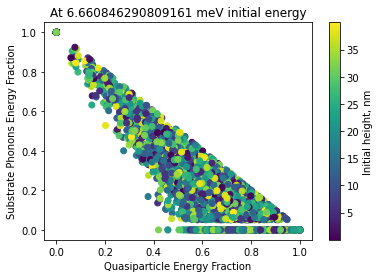

Simulating 10000 7.373047958716827 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


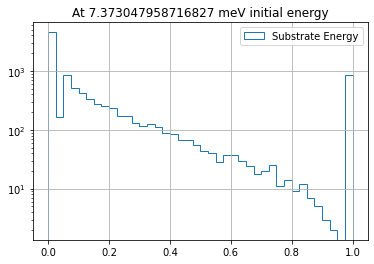

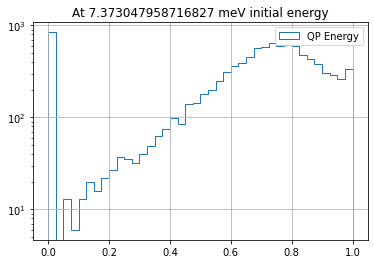

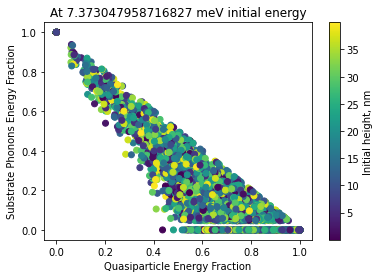

Simulating 10000 8.161400793251834 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


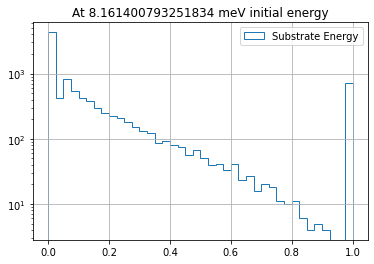

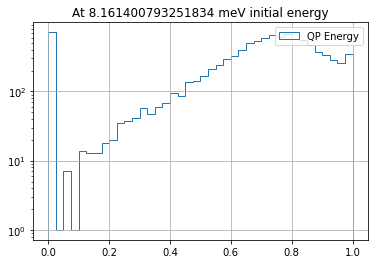

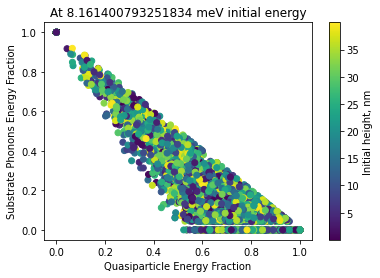

Simulating 10000 9.03404715133358 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


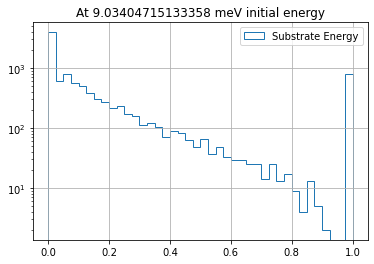

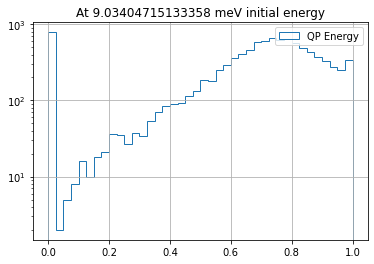

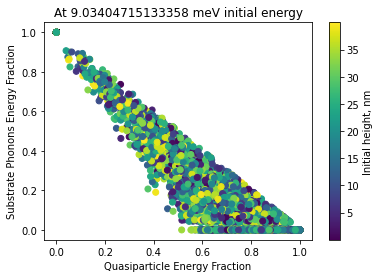

Simulating 10000 10.0 meV phonons
Done with 0 sims
Done with 1000 sims
Done with 2000 sims
Done with 3000 sims
Done with 4000 sims
Done with 5000 sims
Done with 6000 sims
Done with 7000 sims
Done with 8000 sims
Done with 9000 sims


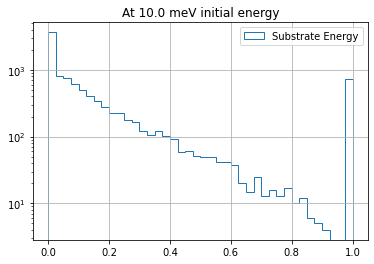

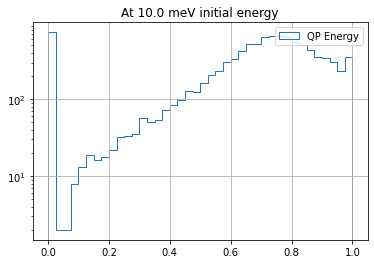

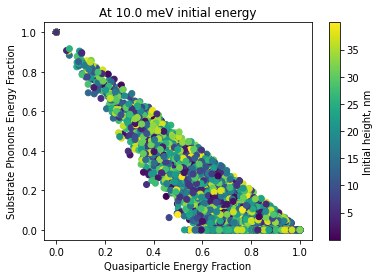

In [19]:
energy_arr = np.logspace(-3.5, -2, num = 35)
print(energy_arr)

sub_energies_arr, qp_energies_arr, initial_heights_arr = get_average_sub_qp_energy_energies(energy_arr, 10000)

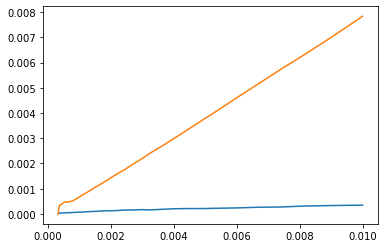

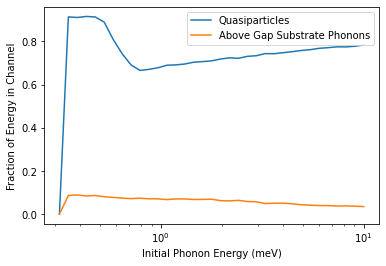

Average fraction in substrate phonons: nan
Average fraction in film QPs: nan


C:\Users\rkrom\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rkrom\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
plt.plot(energy_arr, sub_energies_arr)
plt.plot(energy_arr, qp_energies_arr)
plt.show()

f_qp = []
f_sub = []

i = 0
while i < len(energy_arr):
    f_qp.append(qp_energies_arr[i]/energy_arr[i])
    f_sub.append(sub_energies_arr[i]/energy_arr[i])
    i += 1
    
plt.plot(energy_arr*1e3, f_qp, label = "Quasiparticles")
plt.plot(energy_arr*1e3, f_sub, label = "Above Gap Substrate Phonons")
plt.legend()
plt.xlabel("Initial Phonon Energy (meV)")
plt.ylabel("Fraction of Energy in Channel")
plt.xscale('log')
plt.show()

print("Average fraction in substrate phonons: " + str(np.mean(f_sub[100:])))
print("Average fraction in film QPs: " + str(np.mean(f_qp[100:])))

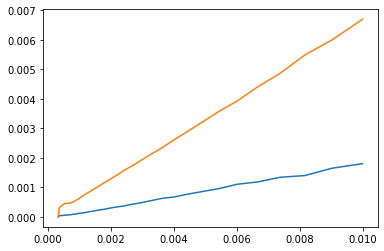

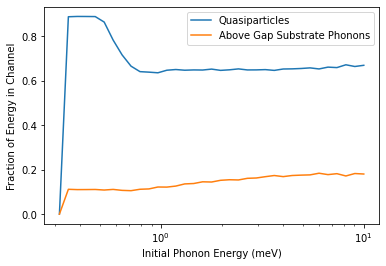

Average fraction in substrate phonons: nan
Average fraction in film QPs: nan


C:\Users\rkrom\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rkrom\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
plt.plot(energy_arr, sub_energies_arr)
plt.plot(energy_arr, qp_energies_arr)
plt.show()

f_qp = []
f_sub = []

i = 0
while i < len(energy_arr):
    f_qp.append(qp_energies_arr[i]/energy_arr[i])
    f_sub.append(sub_energies_arr[i]/energy_arr[i])
    i += 1
    
plt.plot(energy_arr*1e3, f_qp, label = "Quasiparticles")
plt.plot(energy_arr*1e3, f_sub, label = "Above Gap Substrate Phonons")
plt.legend()
plt.xlabel("Initial Phonon Energy (meV)")
plt.ylabel("Fraction of Energy in Channel")
plt.xscale('log')
plt.show()

print("Average fraction in substrate phonons: " + str(np.mean(f_sub[100:])))
print("Average fraction in film QPs: " + str(np.mean(f_qp[100:])))